In [5]:
import csv

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'appointments.csv'

# Open the CSV file
with open(file_path, 'r') as csv_file:
    # Create a CSV reader
    csv_reader = csv.reader(csv_file)

    # Read and print the header if there is one
    header = next(csv_reader, None)
    if header:
        print("CSV Header:", header)

    # Read and print the first 100 lines
    for i, row in enumerate(csv_reader):
        if i < 100:
            print(row)
        else:
            break


CSV Header: ['pxid', 'clinicid', 'doctorid', 'apptid', 'status', 'TimeQueued', 'QueueDate', 'StartTime', 'EndTime', 'type', 'Virtual']
['EF196B348A49FB32DABC9834DC4FAAD9', 'ADF7EE2DCF142B0E11888E72B43FCB75', 'BB04AF0F7ECAEE4AAE62035497DA1387', 'C1CC0949B93D00A559F7A0BD38361E80', 'Complete', '2018-04-11 01:59:58', '2018-04-10 16:00:00', '', '', 'Consultation', '']
['EAE3C87D0B33351272F2E9B9B1B56217', '1E0F65EB20ACBFB27EE05DDC000B50EC', '82AA4B0AF34C2313A562076992E50AA3', '6585A31C60A1886FBA1433C50012B504', 'Queued', '2018-04-10 10:34:16', '2018-04-08 16:00:00', '2018-04-09 10:33:00', '2018-04-12 05:29:57', 'Inpatient', '']
['7C5C93809D626CC702D08F33985B2B58', '1E0F65EB20ACBFB27EE05DDC000B50EC', '82AA4B0AF34C2313A562076992E50AA3', '7250DCFF615E6580295C7E6ED4322371', 'Queued', '2018-04-03 15:26:19', '2018-03-30 16:00:00', '2018-03-31 15:25:00', '2018-04-05 15:51:47', 'Inpatient', '']
['C300C2B9E0E5D4C46E8093BCDBFA05CA', '98C39996BF1543E974747A2549B3107C', 'AD61AB143223EFBC24C7D2583BE69251

In [12]:
import csv
def count_rows(csv_file):
    with open(csv_file, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

input_file = 'px.csv'
output_file = 'px_edited.csv'

rows = count_rows(input_file)
print(f"The CSV file '{input_file}' has {rows} rows.")
rows = count_rows(output_file)
print(f"The CSV file '{output_file}' has {rows} rows.")

The CSV file 'px.csv' has 6507814 rows.
The CSV file 'px_edited.csv' has 5512483 rows.


In [7]:
import pandas as pd

file_path = 'px.csv'

df = pd.read_csv(file_path)
second_age_index = df[df['age'] == 'age'].index[0]
df = df.drop(second_age_index)
df = df.drop_duplicates(subset=['pxid'])

# Save the modified DataFrame back to a CSV file
df.to_csv('px_edited.csv', index=False)


C:\Users\kevin\AppData\Local\Temp\ipykernel_24244\2613247682.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [9]:
import pandas as pd

file_path = 'px.csv'

df = pd.read_csv(file_path)
second_age_index = df[df['age'] == 'age'].index[0]
df = df.drop(second_age_index)

# Save the modified DataFrame back to a CSV file
df.to_csv('px_a.csv', index=False)

C:\Users\kevin\AppData\Local\Temp\ipykernel_24244\2254374841.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [10]:
import pandas as pd

file_path = 'clinics.csv'

df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Replace commas with hyphens in the entire DataFrame
df = df.replace(',', '-', regex=True)

df.to_csv('clinics_edited.csv', index=False)


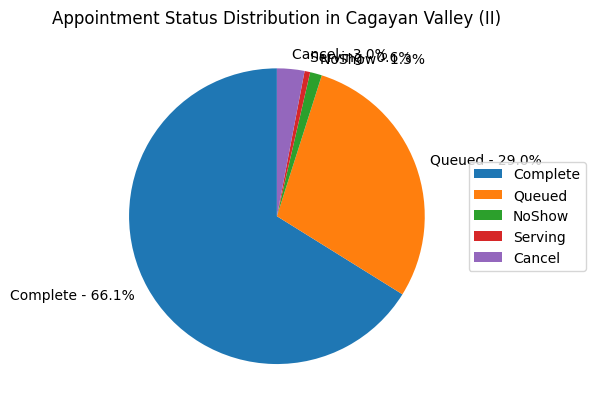

In [13]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL database
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="EDCft0118!",
    database="seriousmd_appointment"
)

# Create a cursor object to execute SQL queries
cursor = connection.cursor()

# Example SQL query
sql_query = """
    SELECT c.RegionName,
           COUNT(CASE WHEN a.status = 'Complete' THEN 1 END) AS Complete_Count,
           COUNT(CASE WHEN a.status = 'Queued' THEN 1 END) AS Queued_Count,
           COUNT(CASE WHEN a.status = 'NoShow' THEN 1 END) AS NoShow_Count,
           COUNT(CASE WHEN a.status = 'Serving' THEN 1 END) AS Serving_Count,
           COUNT(CASE WHEN a.status = 'Cancel' THEN 1 END) AS Cancel_Count
    FROM appointments a
    JOIN clinics c ON a.clinicid = c.clinicid
    WHERE c.RegionName = 'Cagayan Valley (II)'
    GROUP BY c.RegionName;
"""

# Execute the query
cursor.execute(sql_query)

# Fetch all the results
results = cursor.fetchall()

# Close the cursor and connection
cursor.close()
connection.close()

# Extract data for bar chart
labels = ['Complete', 'Queued', 'NoShow', 'Serving', 'Cancel']
data = [results[0][i+1] for i in range(5)]  # Skip the first column (RegionName)

# Create a bar chart
plt.bar(labels, data, color=['green', 'blue', 'orange', 'red', 'purple'])
plt.xlabel('Appointment Status')
plt.ylabel('Count')
plt.title('Appointment Status Distribution in Cagayan Valley (II)')
plt.show()